In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore")

In [2]:
# Own functions:
def plt_csp(Y_test, y_predict):
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(Y_test, y_predict, edgecolors=(0, 0, 0))
    ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

### First sight to data

In [3]:
data = pd.read_csv("Nigerian_Car_prices.csv", index_col=0)

In [4]:
data.head()

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,"3,120,000",NaN
1,Lexus,NaN,NaN,138024.0,NaN,NaN,Automatic,"5,834,000",NaN
2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,"3,640,000",NaN
3,Lexus,NaN,NaN,213362.0,NaN,NaN,Automatic,"3,594,000",NaN
4,Mercedes-Benz,NaN,NaN,106199.0,NaN,NaN,Automatic,"8,410,000",NaN


In [5]:
# Unique values for each field. 
for col in data:
    print("------> ",col," <------")
    print(" ")
    print(data[col].unique())
    print(" ")

------>  Make  <------
 
['Toyota' 'Lexus' 'Mercedes-Benz' 'Fiat' 'Land Rover' 'Foton' 'JAC'
 'Acura' 'Tata' 'Saturn' 'Porsche' 'Lincoln' 'GMC' 'Renault' 'Mini' 'Ford'
 'Buick' 'Cadillac' 'Audi' 'Infiniti' 'Jeep' 'Peugeot' 'Dodge' 'Jaguar'
 'Seat' 'Isuzu' 'Skoda' 'Nissan' 'Hyundai' 'Pontiac' 'Hummer' 'Chevrolet'
 'MG' 'Honda' 'Chrysler' 'Kia' 'SsangYong' 'Mazda' 'Changan' 'Mitsubishi'
 'Suzuki' 'BMW' 'Rover' 'Citroen' 'Volkswagen' 'Volvo' 'Opel' 'Bentley'
 'Daihatsu']
 
------>  Year of manufacture  <------
 
[2007.   nan 2008. 2011. 2014. 2016. 2009. 2017. 2010. 2015. 2006. 2013.
 2000. 2012. 2004. 2018. 2005. 2002. 2001. 2019. 2003. 2020. 2021. 1998.
 1996. 1999. 1997. 1995. 1992. 1994.]
 
------>  Condition  <------
 
['Nigerian Used' nan 'Foreign Used' 'Brand New']
 
------>  Mileage  <------
 
[166418. 138024. 376807. ... 247149. 249325. 235184.]
 
------>  Engine Size  <------
 
[2.40000e+03         nan 3.00000e+03 3.50000e+03 4.60000e+03 2.50000e+03
 5.70000e+03 4.70000e+03 4.50

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 0 to 4094
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 4095 non-null   object 
 1   Year of manufacture  3617 non-null   float64
 2   Condition            3616 non-null   object 
 3   Mileage              4024 non-null   float64
 4   Engine Size          3584 non-null   float64
 5   Fuel                 3607 non-null   object 
 6   Transmission         4075 non-null   object 
 7   Price                4095 non-null   object 
 8   Build                1127 non-null   object 
dtypes: float64(3), object(6)
memory usage: 319.9+ KB


### Data Preparation

In [7]:
# Price format
data['Price'] = data['Price'].str.replace(',','')
data= data.astype({'Price':float})
data['Price'] = data['Price'] / 1000

# Year format
data= data.astype({'Year of manufacture':str})
data['Year of manufacture'] = data['Year of manufacture'].str.replace(',','')
data= data.astype({'Year of manufacture':float})
data['Year of manufacture'] = data['Year of manufacture'].fillna(data['Year of manufacture'].mean())
data['Year of manufacture']= data['Year of manufacture'].round()
data= data.astype({'Year of manufacture':str})
data['Year of manufacture'] = data['Year of manufacture'].str[0:4]
data['Year of manufacture'] = data['Year of manufacture'].astype(int)

# Build: remove this variable, bcus it apports few inf and there are many Nans:
data.reset_index(inplace = True)
data = data.iloc[:, [1,2,3,4,5,6,7,8]]

# Mileage
data = data[data['Mileage'].notna()] # Removing nans in mileage.
data['Mileage'] = data['Mileage'].astype(int).round()
# Note that the std value is higher than the mean, what means that the average is not really representative of the sample.
data['Mileage'].describe().round()
data.reset_index(inplace = True)

In [8]:
# Outliers in price: It is very rare to find cars with a price higher than 30k , therefore I will windosrize the dataset.
data = data[data['Price']<30000]

In [9]:
# Outliers in Mileage: It is only 129 cars with a mileage higher than 400k , therefore I'm going to windosrize it.
data = data[data['Mileage']<400000]

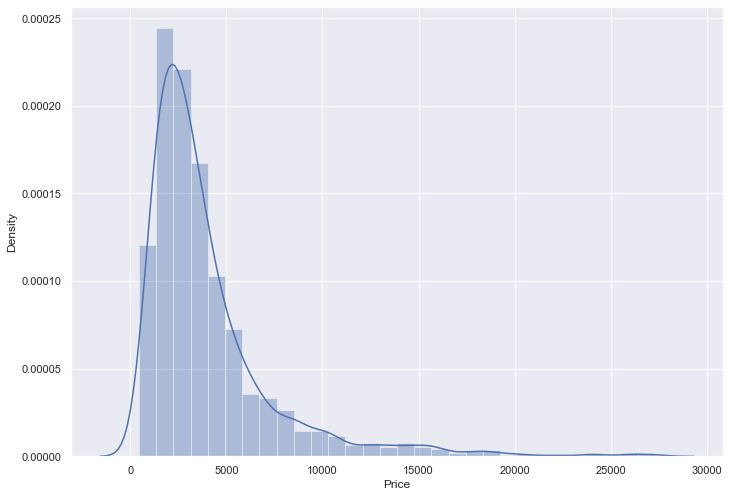

In [10]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(data['Price'], bins=30)
plt.show()

Make
Bentley     16895.00
Changan     12225.00
Rover       10185.00
Lincoln      9310.00
Porsche      9040.43
GMC          8784.60
JAC          7290.00
Jeep         7090.75
Fiat         6945.00
Cadillac     6730.00
Name: Price, dtype: float64


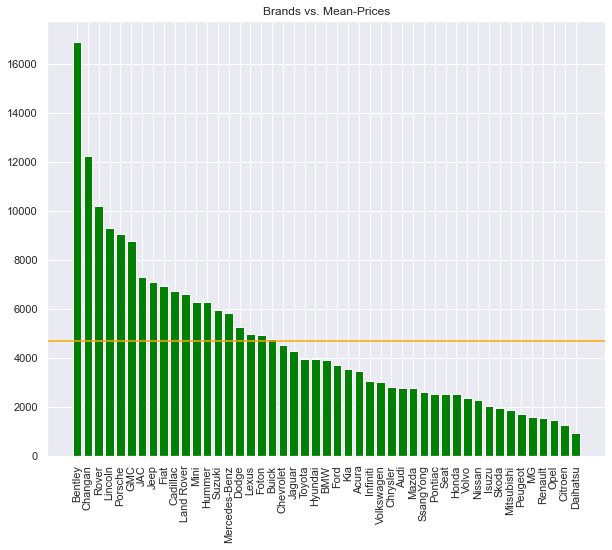

In [11]:
# Analisys of Make vs. Price
gby= data.groupby(['Make']).mean().round(2)['Price']
gby_sort = gby.sort_values(ascending = False)
print(gby_sort[:10])
# It is more understandable to plot graphics from GBY functions:
# Now it is comparing by the mean price.
plt.rcParams["figure.figsize"] = [10, 8]
plt.bar(gby_sort.index, gby_sort.values, width = 0.8, color = "green")
#plt.yticks([]) # remove the "y" names.
plt.title("Brands vs. Mean-Prices")
plt.xticks(rotation=90)
plt.axhline(y=np.nanmean(gby_sort.values), color = 'orange')
plt.show()

Condition
Brand New        106897.50
Foreign Used     172499.38
Nigerian Used    172904.08
Name: Mileage, dtype: float64


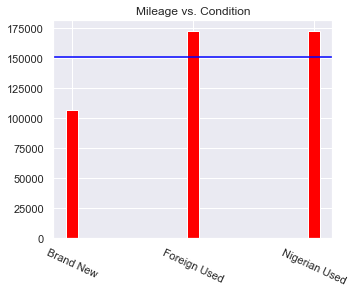

In [12]:
# The Condition and the Mileage are highly correlated
gby2 = data.groupby(['Condition']).mean().round(2)['Mileage']
print(gby2)
plt.rcParams["figure.figsize"] = [5, 4]
plt.bar(gby2.index, gby2.values, width = 0.1, color = "Red")
plt.title("Mileage vs. Condition")
plt.xticks(rotation=-25)
plt.axhline(y=np.nanmean(gby2.values), color = 'Blue')
plt.show()

### Transformation of Categoricals (to numbers)

In [13]:
####### MAKE ########

### Make; convertion to number. I'm going to convert the categorical into number in order to use it in the model.
data.reset_index(inplace = True)
dumi_make = pd.get_dummies(data['Make'], drop_first=True) # I apply dummy function.
pca=PCA(n_components= 4, svd_solver='full') # I apply PCA in order to eliminate colineality relation between variables.
Pca_make= pca.fit_transform(dumi_make)
print(pca.explained_variance_ratio_)

Make = pd.DataFrame(Pca_make, columns = ['Make1', 'Make2', 'Make3','Make4'])
data_treated = data.join(Make).drop(columns = ['Make','level_0','index'])


[0.31833036 0.13779868 0.12869093 0.08269021]


In [14]:
####### TRANSMISION ########

### TRANSMISION adaptation and inferation of missing values.
df_trans = data_treated[['Make1','Make2','Make3','Make4','Year of manufacture','Mileage','Price','Transmission']]
# Aplication of KNN to infer the nans in transmission: 
X =  data_treated[['Make1','Make2','Make3','Make4','Year of manufacture','Mileage','Price']]
y = data_treated['Transmission']
scaler = MinMaxScaler()
scaler.fit(X)
X_tr = scaler.transform(X).round(4)
X = pd.DataFrame(X_tr, columns=['Make1','Make2','Make3','Make4','Year of manufacture','Mileage','Price'] )
df_trans1 = X.join(y)

trans_target = df_trans1[df_trans1['Transmission'].isna()] # Data to infer
df_trans1 = df_trans1.dropna() # Data to train the model
X =  df_trans1[['Make1','Make2','Make3','Make4','Year of manufacture','Mileage','Price']]
y = df_trans1['Transmission']
# train-test -split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)
# Knn
knn=KNeighborsClassifier(n_neighbors=3, weights = 'distance') # weights= distance to correct the imbalanced problem
knn.fit(X_train, y_train)
print(y.value_counts()) # the problem is not balance in the class variable. So we need to invert weights in the params of the model.
# Kindness
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))
# Confussion matrix
conf=pd.DataFrame(
confusion_matrix(y_test, y_pred),
columns=['Predicted AMT', 'Predicted AUTOM', 'Predicted CVT','Predicted MANUAL'],
index =['True AMT', 'True AUTOM', 'True CVT','True MANUAL']
)
print(conf)
# Prediction
trans_target= trans_target.drop(columns= 'Transmission')
predicted_trans= knn.predict(trans_target)
print(predicted_trans)
trans_target['Transmission'] = predicted_trans
trans_target = trans_target[['Transmission']]
# Code to insert calculated values for transmission
indices = trans_target.index
data_treated.loc[indices, 'Transmission'] = trans_target.values
# Transmission; convertion to number
data_treated.reset_index(inplace = True)
dumi_trans = pd.get_dummies(data_treated['Transmission'], drop_first=True)
pca=PCA(n_components= 1, svd_solver='full') #¿¿Que criterio se usa para escoger el numero de componentes?? --> los autovalores
Pca_trans= pca.fit_transform(dumi_trans)
print(pca.explained_variance_ratio_)

Trans = pd.DataFrame(Pca_trans, columns = ['Transmission_pca1'])
data_treated = data_treated.join(Trans).drop(columns = ['Transmission','index'])


Automatic    3611
Manual        213
CVT            22
AMT            13
Name: Transmission, dtype: int64
              precision    recall  f1-score   support

         AMT       0.50      0.25      0.33         4
   Automatic       0.96      0.98      0.97      1094
         CVT       0.50      0.25      0.33         4
      Manual       0.48      0.36      0.41        56

    accuracy                           0.94      1158
   macro avg       0.61      0.46      0.51      1158
weighted avg       0.94      0.94      0.94      1158

             Predicted AMT  Predicted AUTOM  Predicted CVT  Predicted MANUAL
True AMT                 1                3              0                 0
True AUTOM               1             1070              1                22
True CVT                 0                3              1                 0
True MANUAL              0               36              0                20
['Automatic' 'Automatic' 'Automatic' 'Manual' 'Manual' 'Automatic'
 'Automa

In [15]:
####### CONDITION ########

### CONDITION adaptation and inferation of missing values.
df_cond = data_treated.loc[:, ~data_treated.columns.isin(['Fuel', 'Condition','Engine Size'])] # Coger todas las columnas menos las especificadas
# Aplication of KNN to infer the nans in transmission: 
X =  data_treated.loc[:, ~data_treated.columns.isin(['Fuel', 'Condition','Engine Size'])] 
y = data_treated['Condition']
scaler = MinMaxScaler()
scaler.fit(X)
X_tr = scaler.transform(X).round(4)
# Aplication of KNN to infer the nans in Condition:
X = pd.DataFrame(X_tr, columns=['Year of manufacture','Mileage','Price','Make1','Make2','Make3','Make4','Transmission_pca1'])
df_cond1 = X.join(y)
cond_target = df_cond1[df_cond1['Condition'].isna()] # Data to infer
df_cond1 = df_cond1.dropna() # Data to train the model
X =  df_cond1[['Year of manufacture','Mileage','Price','Make1','Make2','Make3','Make4','Transmission_pca1']]
y = df_cond1['Condition']
# train-test -split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)
# Knn
knn=KNeighborsClassifier(n_neighbors=5, weights = 'distance', ) # weights= distance to correct the imbalanced problem
knn.fit(X_train, y_train)
# Kindness
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))
# Confussion matrix
conf=pd.DataFrame(
confusion_matrix(y_test, y_pred),
columns=['Pred Brand New', 'Pred Foreign Used', 'Pred Nigerian Used '],
index =['True Brand New', 'True Foreign Used', 'True Nigerian Used']
)
print(conf)
cond_target= cond_target.drop(columns= ['Condition'])
# Prediction and merging into principal dataframe
predicted_cond= knn.predict(cond_target)
print(predicted_cond[0:10])

cond_target['Condition'] = predicted_cond
cond_target = cond_target[['Condition']]

# Code to insert calculated values for transmission
indices = cond_target.index
data_treated.loc[indices, 'Condition'] = cond_target.values

cond_target.reset_index(inplace = True)
cond_target= cond_target.drop(columns= ['index'])

# Condition; convertion to number
data_treated.reset_index(inplace = True)
dumi_trans = pd.get_dummies(data_treated['Condition'], drop_first=True)
pca=PCA(n_components= 1, svd_solver='full') #¿¿Que criterio se usa para escoger el numero de componentes?? --> los autovalores
Pca_trans= pca.fit_transform(dumi_trans)
print(pca.explained_variance_ratio_)

Conds = pd.DataFrame(Pca_trans, columns = ['Condition_pCA'])
data_treated = data_treated.join(Conds).drop(columns = ['Condition','index'])


               precision    recall  f1-score   support

    Brand New       0.00      0.00      0.00         1
 Foreign Used       0.69      0.60      0.64       323
Nigerian Used       0.82      0.88      0.85       701

     accuracy                           0.79      1025
    macro avg       0.51      0.49      0.50      1025
 weighted avg       0.78      0.79      0.78      1025

                    Pred Brand New  Pred Foreign Used  Pred Nigerian Used 
True Brand New                   0                  0                    1
True Foreign Used                0                193                  130
True Nigerian Used               0                 85                  616
['Foreign Used' 'Nigerian Used' 'Foreign Used' 'Foreign Used'
 'Nigerian Used' 'Foreign Used' 'Foreign Used' 'Nigerian Used'
 'Foreign Used' 'Nigerian Used']
[0.9993812]


In [16]:
####### ENGINE SIZE ########

# Outlier in Engine Size
print(data_treated[data_treated['Engine Size']>180000])
#data_treated = data_treated.drop([3935],axis=0)
data_treated.reset_index(inplace = True)
data_treated= data_treated.drop(columns= ['index'])
print(data_treated['Engine Size'].describe())

# Cast the ranges in "Engine Size":
data_treated['Engine Size'][data_treated['Engine Size']<=2000] = 1
data_treated['Engine Size'][(data_treated['Engine Size']>2000) & (data_treated['Engine Size']<=2500)] = 2
data_treated['Engine Size'][(data_treated['Engine Size']>2500) & (data_treated['Engine Size']<=3500)] = 3
data_treated['Engine Size'][(data_treated['Engine Size']>3500) & (data_treated['Engine Size']<=56000)] = 4

### ENGINE SIZE adaptation and inferation of missing values.
df_engine = data_treated.loc[:, ~data_treated.columns.isin(['Fuel', 'Engine Size'])]
# Aplication of KNN to infer the nans in transmission: 
X =  data_treated.loc[:, ~data_treated.columns.isin(['Fuel','Engine Size'])] 
y = data_treated['Engine Size']
scaler = MinMaxScaler()
scaler.fit(X)
X_tr = scaler.transform(X).round(4)

X = pd.DataFrame(X_tr, columns=['Year of manufacture','Mileage','Price','Make1','Make2','Make3','Make4','Transmission_pca1','Condition_pCA'])
df_engine1 = X.join(y)

engi_target = df_engine1[df_engine1['Engine Size'].isna()] # Data to infer
df_engine1 = df_engine1.dropna() # Data to train the model
X =  df_engine1[['Year of manufacture','Mileage','Price','Make1','Make2','Make3','Make4','Transmission_pca1','Condition_pCA']]
y = df_engine1['Engine Size']

# train-test -split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

# Knn
knn=KNeighborsClassifier(n_neighbors=5, weights = 'distance' ) # weights= distance to correct the imbalanced problem
knn.fit(X_train, y_train)

# Kindness
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(" ")

# Confussion matrix
conf=pd.DataFrame(
confusion_matrix(y_test, y_pred),
columns=['Pred 1', 'Pred 2', 'Pred 3','Pred 4'],
index =['True 1', 'True 2', 'True 3', 'True 4']
)
print(conf)
print(" ")
engi_target= engi_target.drop(columns= ['Engine Size'])

# Prediction and merging into principal dataframe
predicted_engi= knn.predict(engi_target)
print("First ten infer results: ",predicted_engi[0:10])
print(" ")

engi_target['Engine Size'] = predicted_engi
engi_target = engi_target[['Engine Size']]

# Code to insert calculated values for Engine Size
indices = engi_target.index
data_treated.loc[indices, 'Engine Size'] = engi_target.values

engi_target.reset_index(inplace = True)
engi_target= engi_target.drop(columns= ['index'])

# Engine Size; convertion to number
dumi_engi = pd.get_dummies(data_treated['Engine Size'], drop_first=True)
pca=PCA(n_components= 1, svd_solver='full') 
Pca_engi= pca.fit_transform(dumi_engi)
print("Eigenvalues: ",pca.explained_variance_ratio_)
print(" ")

Engi = pd.DataFrame(Pca_engi, columns = ['Engine_pCA'])
data_treated = data_treated.join(Engi).drop(columns = ['Engine Size'])


      Year of manufacture  Mileage  Engine Size    Fuel   Price     Make1  \
3782                 2012   296796     184421.0  Petrol  5287.5  0.670254   

         Make2     Make3     Make4  Transmission_pca1  Condition_pCA  
3782  0.011808 -0.003182 -0.038207          -0.085386         0.9939  
count      3383.000000
mean       3185.033993
std        4699.556100
min           3.000000
25%        2000.000000
50%        2600.000000
75%        3500.000000
max      184421.000000
Name: Engine Size, dtype: float64
              precision    recall  f1-score   support

         1.0       0.61      0.63      0.62       278
         2.0       0.51      0.53      0.52       231
         3.0       0.69      0.72      0.70       395
         4.0       0.63      0.44      0.52       111

    accuracy                           0.62      1015
   macro avg       0.61      0.58      0.59      1015
weighted avg       0.62      0.62      0.62      1015

 
        Pred 1  Pred 2  Pred 3  Pred 4
True 1   

In [17]:
### FUEL adaptation and inferation of missing values.

data_treated['Fuel'].fillna(data_treated['Fuel'].mode(), inplace=True)

# Fuel; convertion to number
dumi_fuel = pd.get_dummies(data_treated['Fuel'], drop_first=True)
pca=PCA(n_components= 1, svd_solver='full') #¿¿Que criterio se usa para escoger el numero de componentes?? --> los autovalores
Pca_fuel= pca.fit_transform(dumi_fuel)
print("Eigenvalues: ",pca.explained_variance_ratio_)
print(" ")

Fuel = pd.DataFrame(Pca_fuel, columns = ['Fuel_pCA'])
data_treated = data_treated.join(Fuel).drop(columns = ['Fuel'])
data_treated

Eigenvalues:  [0.93177853]
 


,Year of manufacture,Mileage,Price,Make1,Make2,Make3,Make4,Transmission_pca1,Condition_pCA,Engine_pCA,Fuel_pCA
0,2007,166418,3120.00,0.670254,0.011808,-0.003182,-0.038207,-0.085386,-0.420313,0.730733,-0.134993
1,2008,138024,5834.00,-0.481233,0.805542,-0.073905,-0.232056,-0.085386,0.993900,-0.635130,0.863080
2,2008,376807,3640.00,-0.450289,-0.476959,-0.666100,-0.291141,-0.085386,-0.420313,-0.635130,-0.134993
3,2008,213362,3594.00,-0.481233,0.805542,-0.073905,-0.232056,-0.085386,-0.420313,-0.635130,0.863080
4,2008,106199,8410.00,-0.450289,-0.476959,-0.666100,-0.291141,-0.085386,0.993900,-0.635130,0.863080
...,...,...,...,...,...,...,...,...,...,...,...
3861,2004,207446,1125.00,-0.443535,-0.346357,0.741928,-0.309824,-0.085386,-0.420313,-0.635130,-0.134993
3862,2005,106914,2643.75,0.670254,0.011808,-0.003182,-0.038207,-0.085386,-0.420313,0.202171,-0.134993
3863,2006,247149,1462.50,-0.443535,-0.346357,0.741928,-0.309824,-0.085386,-0.420313,0.202171,-0.134993
3864,2007,249325,2475.00,0.670254,0.011808,-0.003182,-0.038207,-0.085386,-0.420313,0.730733,-0.134993


### Correlation with the class


                      Price
Year of manufacture  0.5497
Condition_pCA        0.3488
Fuel_pCA             0.1008
Engine_pCA          -0.1134
Make3               -0.2230
Mileage             -0.3368


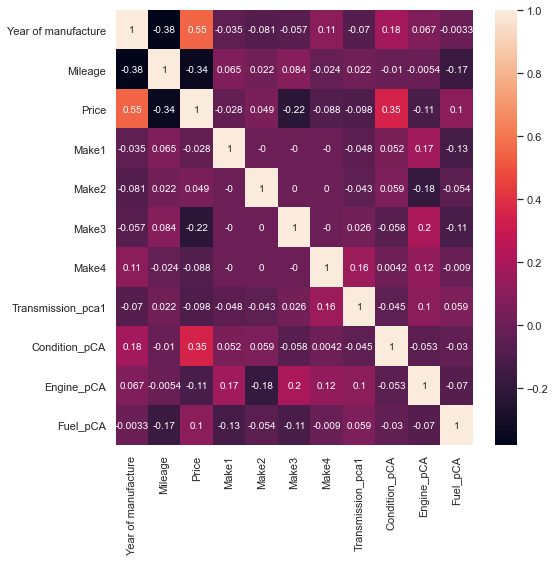

In [18]:
# Correlation
correlation_matrix = data_treated.corr().round(4)
mask_dum = (correlation_matrix <= -0.1) | (correlation_matrix >= 0.1) & (correlation_matrix != 1) # Mascara
corr_reduced = correlation_matrix[mask_dum] # Aplicamos mascara
print(corr_reduced[['Price']].dropna(axis=0, how= 'all').sort_values(by= 'Price', ascending = False))
%matplotlib inline
plt.figure(figsize=(8, 8))
sns.heatmap(data=correlation_matrix, annot=True)

In [19]:
# I just keep the most correlated varaibles with the class in order to avoid noise.
# mask2 = (corr_reduced[['Price']].dropna(axis=0, how= 'all').index).to_list()
# mask2.append('Price')
# data_treated = data_treated[mask2]

### Normalization and Standardization of data

In [20]:
# Splitting data into inputs and target:
X_pre = data_treated.iloc[:,[0,1,3,4,5,6,7,8,9]]
y = data_treated['Price']

In [21]:
X_pre

,Year of manufacture,Mileage,Make1,Make2,Make3,Make4,Transmission_pca1,Condition_pCA,Engine_pCA
0,2007,166418,0.670254,0.011808,-0.003182,-0.038207,-0.085386,-0.420313,0.730733
1,2008,138024,-0.481233,0.805542,-0.073905,-0.232056,-0.085386,0.993900,-0.635130
2,2008,376807,-0.450289,-0.476959,-0.666100,-0.291141,-0.085386,-0.420313,-0.635130
3,2008,213362,-0.481233,0.805542,-0.073905,-0.232056,-0.085386,-0.420313,-0.635130
4,2008,106199,-0.450289,-0.476959,-0.666100,-0.291141,-0.085386,0.993900,-0.635130
...,...,...,...,...,...,...,...,...,...
3861,2004,207446,-0.443535,-0.346357,0.741928,-0.309824,-0.085386,-0.420313,-0.635130
3862,2005,106914,0.670254,0.011808,-0.003182,-0.038207,-0.085386,-0.420313,0.202171
3863,2006,247149,-0.443535,-0.346357,0.741928,-0.309824,-0.085386,-0.420313,0.202171
3864,2007,249325,0.670254,0.011808,-0.003182,-0.038207,-0.085386,-0.420313,0.730733


In [22]:
# Applying normalization and standardization over inputs
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=min_max.fit_transform(X_pre)
from sklearn.preprocessing import scale
df_final=scale(df_minmax)
X = pd.DataFrame(df_final)

In [23]:
pca=PCA(n_components= 9, svd_solver='full') 
Pca_final= pca.fit_transform(X)
print("Eigenvalues: ",pca.explained_variance_ratio_)
print(" ")
X = pd.DataFrame(Pca_final)


Eigenvalues:  [0.16491946 0.15627109 0.12663631 0.11885541 0.10877702 0.1005067
 0.09080701 0.07162664 0.06160037]
 


In [24]:
# Train - Test - Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)


### Algoritmos

In [25]:
# LINEAR REGRESSION

In [26]:
# Regresión: 
lin_model = LinearRegression(normalize = True)
lin_model.fit(X_train, y_train)

# Evaluación de Modelo:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("La performance del model para training es:")
print("--------------------------------------")
print('RMSE  {}'.format(rmse))
print('R2 score  {}'.format(r2))
print("\n")

# Model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# Root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# R-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("La performance del modelo para test es:")
print("--------------------------------------")
print('RMSE  {}'.format(rmse))
print('R2 score {}'.format(r2))

La performance del model para training es:
--------------------------------------
RMSE  2666.116585140708
R2 score  0.4485328835375496


La performance del modelo para test es:
--------------------------------------
RMSE  2452.3810857510543
R2 score 0.445535030464575


In [27]:
# Cross Folder Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_model, X_train, y_train, scoring='r2', cv=5)
scores.mean()

0.4402737904887001

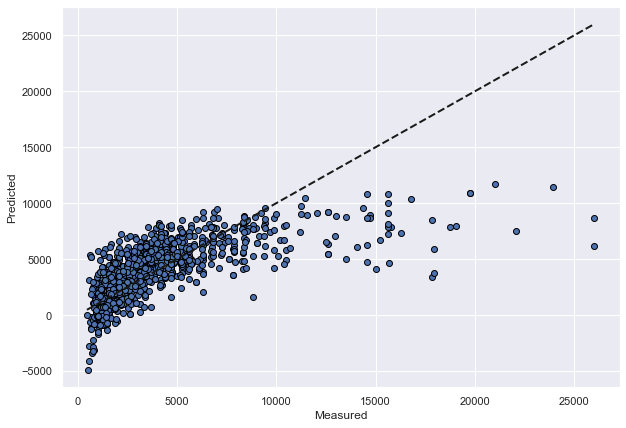

In [28]:
# Error's visualization:
plt_csp(y_test, y_test_predict)

**As we can see Linear Regression doesn't adjust the distribution of the model**

In [32]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  poly_features = PolynomialFeatures(degree=degree)
  
  # transform the features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict_2 = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict_2))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [33]:
create_polynomial_regression_model(3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 1983.940284870535
R2 score of training set is 0.6946355048725688


The model performance for the test set
-------------------------------------------
RMSE of test set is 2226.7966869118145
R2 score of test set is 0.445535030464575


**We can observe that the error has reduced after using polynomial regression as compared to linear regression**